In [1]:
import os
import sys
import math
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy.optimize import minimize_scalar
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

import audio_features as af

In [2]:
SAVE_FILE = True
DIR_NAME = "clustering_plots"
EXTENSION = "png"

In [3]:
def save_plot(filename):
    if SAVE_FILE:
        plt.savefig(DIR_NAME + "/" + filename + "." + EXTENSION, dpi=300, bbox_inches='tight')

In [4]:
SPOTIFY_DATASET = "spotify/genres_v2.csv"

In [5]:
spotify_df = pd.read_csv(
    SPOTIFY_DATASET
)
spotify_df.head()

c:\users\aruko\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3172: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
0,0.831,0.814,2,-7.364,1,0.4200,0.0598,0.013400,0.0556,0.3890,...,2Vc6NJ9PW9gD9q343XFRKx,spotify:track:2Vc6NJ9PW9gD9q343XFRKx,https://api.spotify.com/v1/tracks/2Vc6NJ9PW9gD...,https://api.spotify.com/v1/audio-analysis/2Vc6...,124539,4,Dark Trap,Mercury: Retrograde,NaN,NaN
1,0.719,0.493,8,-7.230,1,0.0794,0.4010,0.000000,0.1180,0.1240,...,7pgJBLVz5VmnL7uGHmRj6p,spotify:track:7pgJBLVz5VmnL7uGHmRj6p,https://api.spotify.com/v1/tracks/7pgJBLVz5Vmn...,https://api.spotify.com/v1/audio-analysis/7pgJ...,224427,4,Dark Trap,Pathology,NaN,NaN
2,0.850,0.893,5,-4.783,1,0.0623,0.0138,0.000004,0.3720,0.0391,...,0vSWgAlfpye0WCGeNmuNhy,spotify:track:0vSWgAlfpye0WCGeNmuNhy,https://api.spotify.com/v1/tracks/0vSWgAlfpye0...,https://api.spotify.com/v1/audio-analysis/0vSW...,98821,4,Dark Trap,Symbiote,NaN,NaN
3,0.476,0.781,0,-4.710,1,0.1030,0.0237,0.000000,0.1140,0.1750,...,0VSXnJqQkwuH2ei1nOQ1nu,spotify:track:0VSXnJqQkwuH2ei1nOQ1nu,https://api.spotify.com/v1/tracks/0VSXnJqQkwuH...,https://api.spotify.com/v1/audio-analysis/0VSX...,123661,3,Dark Trap,ProductOfDrugs (Prod. The Virus and Antidote),NaN,NaN
4,0.798,0.624,2,-7.668,1,0.2930,0.2170,0.000000,0.1660,0.5910,...,4jCeguq9rMTlbMmPHuO7S3,spotify:track:4jCeguq9rMTlbMmPHuO7S3,https://api.spotify.com/v1/tracks/4jCeguq9rMTl...,https://api.spotify.com/v1/audio-analysis/4jCe...,123298,4,Dark Trap,Venom,NaN,NaN


In [6]:
spotify_df.describe(include="all")

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,...,id,uri,track_href,analysis_url,duration_ms,time_signature,genre,song_name,Unnamed: 0,title
count,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,42305.000000,...,42305,42305,42305,42305,42305.000000,42305.000000,42305,21519,20780.000000,20780
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,35877,35877,35877,35877,NaN,NaN,15,15439,NaN,132
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7D5qMGajdfznFcXFArk5VE,spotify:track:7D5qMGajdfznFcXFArk5VE,https://api.spotify.com/v1/tracks/7D5qMGajdfzn...,https://api.spotify.com/v1/audio-analysis/7D5q...,NaN,NaN,Underground Rap,Forever,NaN,Euphoric Hardstyle
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9,9,9,9,NaN,NaN,5875,14,NaN,1398
mean,0.639364,0.762516,5.370240,-6.465442,0.549462,0.136561,0.096160,0.283048,0.214079,0.357101,...,NaN,NaN,NaN,NaN,250865.846685,3.972580,NaN,NaN,10483.970645,NaN
std,0.156617,0.183823,3.666145,2.941165,0.497553,0.126168,0.170827,0.370791,0.175576,0.233200,...,NaN,NaN,NaN,NaN,102957.713571,0.268342,NaN,NaN,6052.359519,NaN
min,0.065100,0.000243,0.000000,-33.357000,0.000000,0.022700,0.000001,0.000000,0.010700,0.018700,...,NaN,NaN,NaN,NaN,25600.000000,1.000000,NaN,NaN,0.000000,NaN
25%,0.524000,0.632000,1.000000,-8.161000,0.000000,0.049100,0.001730,0.000000,0.099600,0.161000,...,NaN,NaN,NaN,NaN,179840.000000,4.000000,NaN,NaN,5255.750000,NaN
50%,0.646000,0.803000,6.000000,-6.234000,1.000000,0.075500,0.016400,0.005940,0.135000,0.322000,...,NaN,NaN,NaN,NaN,224760.000000,4.000000,NaN,NaN,10479.500000,NaN
75%,0.766000,0.923000,9.000000,-4.513000,1.000000,0.193000,0.107000,0.722000,0.294000,0.522000,...,NaN,NaN,NaN,NaN,301133.000000,4.000000,NaN,NaN,15709.250000,NaN


In [7]:
genres_df = spotify_df["genre"]
spotify_df = spotify_df[["danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "duration_ms"]]
genres_df.unique()

array(['Dark Trap', 'Underground Rap', 'Trap Metal', 'Emo', 'Rap', 'RnB',
       'Pop', 'Hiphop', 'techhouse', 'techno', 'trance', 'psytrance',
       'trap', 'dnb', 'hardstyle'], dtype=object)

In [8]:
genres_df_count = genres_df.reset_index().groupby("genre").count()
genres_df_count = genres_df_count.transpose()
genres_df_count

genre,Dark Trap,Emo,Hiphop,Pop,Rap,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
index,4578,1680,3028,461,1848,2099,1956,5875,2966,2936,2961,2975,2956,2999,2987


In [23]:
columns_to_cluster = ['acousticness', 'danceability', 'instrumentalness', 'liveness', 'tempo','speechiness', 'loudness']

In [24]:
mms = MinMaxScaler()

spotify_scaled = mms.fit_transform(spotify_df[columns_to_cluster])
print("Scales: ", spotify_scaled[0,:])

Scales:  [0.0605253  0.82988406 0.01354904 0.0459429  0.61000598 0.43030434
 0.71203945]


In [25]:
columns_to_cluster_scaled = ['acousticness_scaled', 'danceability_scaled', 'instrumentalness_scaled', 'liveness_scaled', 'tempo_scaled','speechiness_scaled', 'loudness_scaled']

spotify_scaled_df = pd.DataFrame(spotify_scaled, columns=columns_to_cluster_scaled)

In [26]:
n_clusters = range(2, len(genres_df.unique()))
wcss = []
sc = []

for n in n_clusters:
    km = KMeans(n_clusters=n, max_iter=300, n_init=10, init='k-means++', random_state=42)
    km.fit(spotify_scaled)
    preds = km.predict(spotify_scaled)
    centers = km.cluster_centers_
    wcss.append(km.inertia_)
    score = silhouette_score(spotify_scaled, preds, metric='euclidean')
    sc.append(score)
    print("Number of Clusters = {}, Silhouette Score = {}".format(n, score))

Number of Clusters = 2, Silhouette Score = 0.45882314789388123
Number of Clusters = 3, Silhouette Score = 0.28811153710077697
Number of Clusters = 4, Silhouette Score = 0.2993922011457855
Number of Clusters = 5, Silhouette Score = 0.2981973590407181
Number of Clusters = 6, Silhouette Score = 0.24471642317173944
Number of Clusters = 7, Silhouette Score = 0.24741779661809288
Number of Clusters = 8, Silhouette Score = 0.22809902317513625
Number of Clusters = 9, Silhouette Score = 0.2289442517770986
Number of Clusters = 10, Silhouette Score = 0.23359418942261853
Number of Clusters = 11, Silhouette Score = 0.22611323156331545
Number of Clusters = 12, Silhouette Score = 0.2299236794278319
Number of Clusters = 13, Silhouette Score = 0.22539974442614083
Number of Clusters = 14, Silhouette Score = 0.2166818098177558


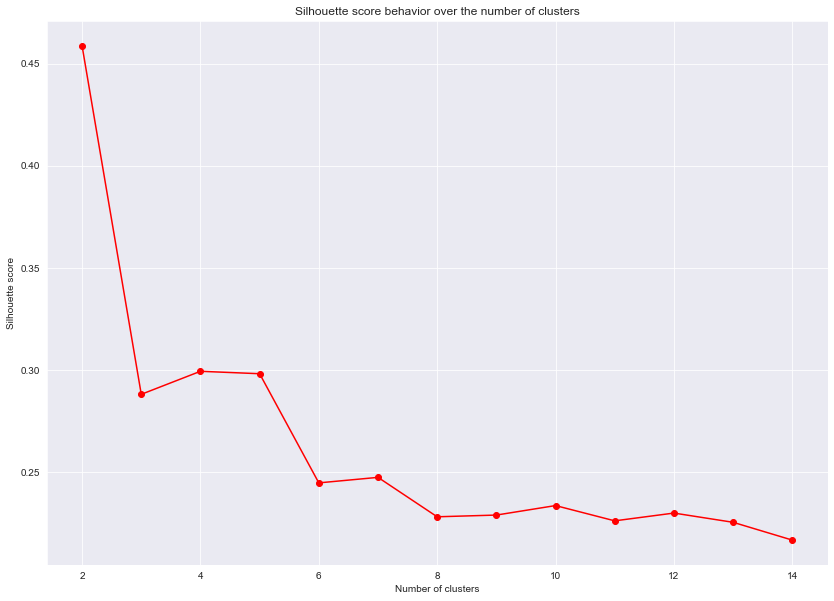

In [27]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(n_clusters, sc, marker='.', markersize=12, color='red')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.title('Silhouette score behavior over the number of clusters')
save_plot("silhouette_score_no_emotions")
plt.show()

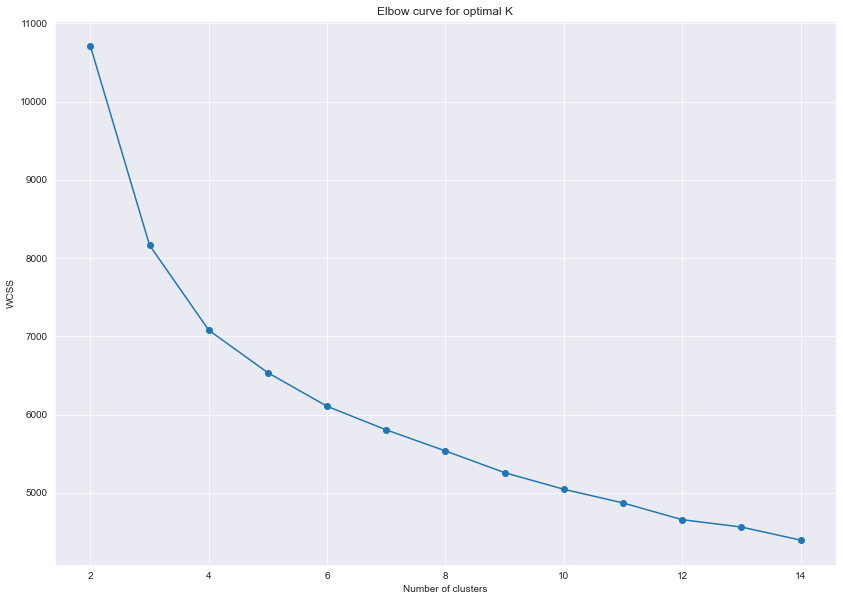

In [16]:
fig, ax = plt.subplots(figsize=(14,10))
ax.plot(n_clusters, wcss, marker='.', markersize=12)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow curve for optimal K')
plt.show()

In [28]:
k=6

model = KMeans(n_clusters=k, random_state=42).fit(spotify_scaled)
# pred = model.predict(spotify_scaled)
print('10 first clusters: ', model.labels_[:10])

10 first clusters:  [2 0 2 3 2 2 2 2 2 5]


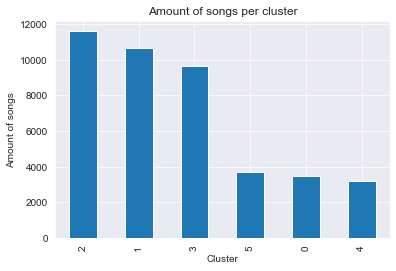

In [29]:
spotify_scaled_df["cluster"] = model.labels_

spotify_scaled_df['cluster'].value_counts().plot(kind='bar')
plt.xlabel('Cluster')
plt.ylabel('Amount of songs')
plt.title('Amount of songs per cluster')
save_plot("spotify_clusters_amount")
plt.show()

In [30]:
display(spotify_scaled_df['cluster'].value_counts())
minor_cluster = spotify_scaled_df['cluster'].value_counts().tail(1)
print("Amount of songs in the smallest cluster: ", int(minor_cluster.values))

2    11600
1    10664
3     9637
5     3683
0     3497
4     3224
Name: cluster, dtype: int64

Amount of songs in the smallest cluster:  3224


In [31]:
rename_columns = dict(zip(columns_to_cluster_scaled,columns_to_cluster))

df_radar = spotify_scaled_df.groupby('cluster')[columns_to_cluster_scaled].mean().reset_index().rename(columns=rename_columns)
df_radar

,cluster,acousticness,danceability,instrumentalness,liveness,tempo,speechiness,loudness
0,0,0.556918,0.638089,0.019450,0.149997,0.570694,0.173452,0.683728
1,1,0.040001,0.635197,0.808806,0.116486,0.501251,0.049201,0.708670
2,2,0.089368,0.775328,0.020912,0.144657,0.554278,0.197949,0.730434
3,3,0.043719,0.472180,0.055756,0.176007,0.591520,0.085177,0.774785
4,4,0.012637,0.526093,0.775714,0.503048,0.537123,0.058326,0.744179
5,5,0.066413,0.564307,0.036272,0.554174,0.576893,0.211967,0.781165


In [32]:
def make_radar(row, title, color, dframe, num_clusters):
    # number of variable
    categories=list(dframe)[1:]
    N = len(categories)

    # What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * math.pi for n in range(N)]
    angles += angles[:1]

    # Initialise the radar plot
    #ax = plt.subplot(4,ceil(num_clusters/4),row+1, polar=True, )
    ax = plt.subplot(2, math.ceil(num_clusters/2),row+1, polar=True, )

    # If you want the first axis to be on top:
    ax.set_theta_offset(math.pi / 2)
    ax.set_theta_direction(-1)

    # Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=14)

    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2,0.4,0.6,0.8], ["0.2","0.4","0.6","0.8"], color="grey", size=8)
    plt.ylim(0,1)

    # Ind1
    values=dframe.loc[row].drop('cluster').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

    # Add a title
    plt.title(title, size=16, color=color, y=1.06)

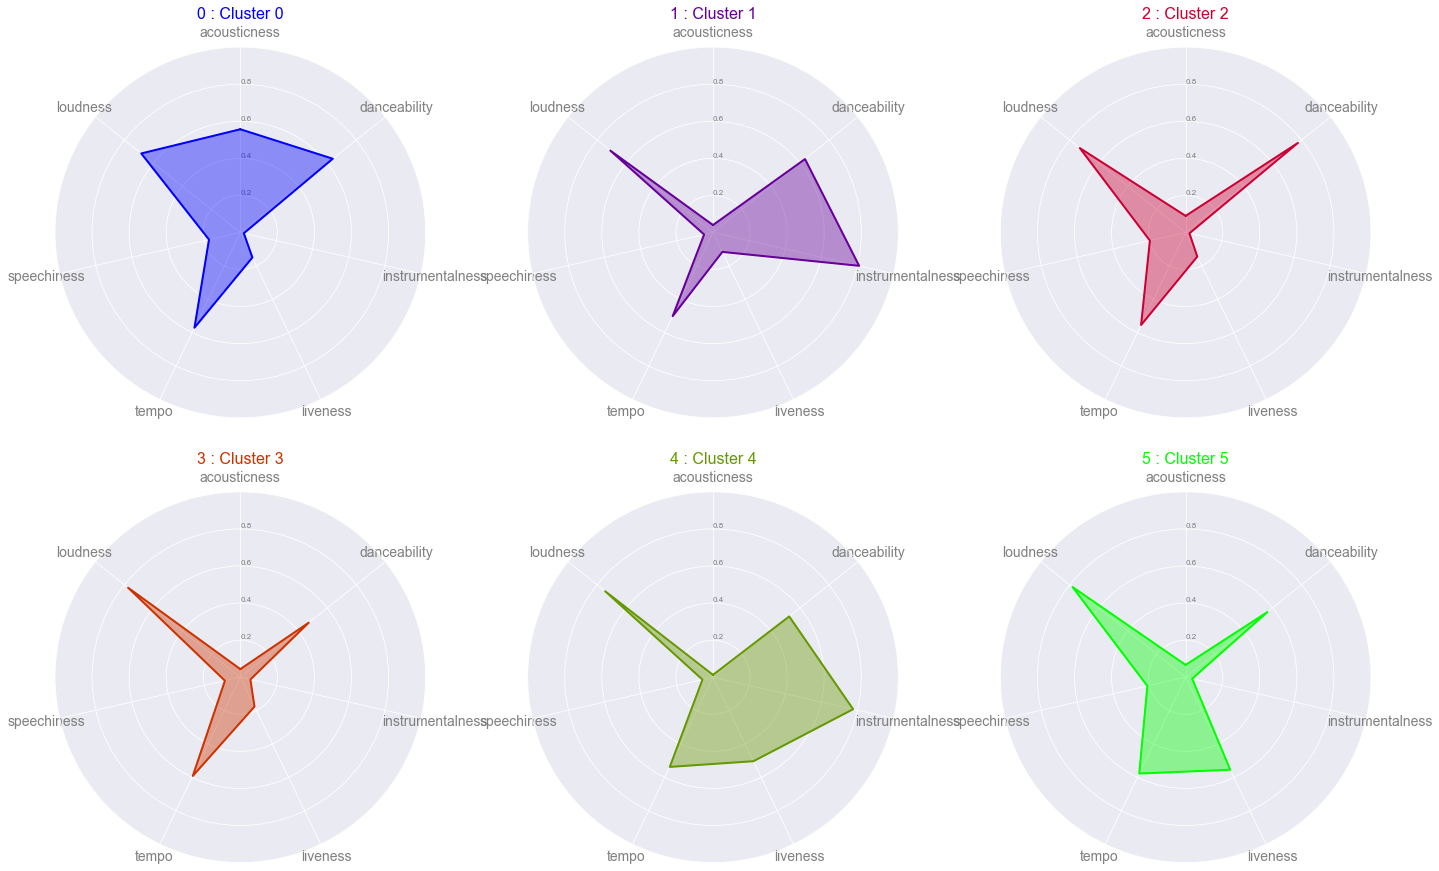

In [33]:
plt.figure(figsize=(24,15))

# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(df_radar.index))

# Create cluster name
title_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3',
              'Cluster 4', 'Cluster 5']

# Loop to plot
for row in range(0, len(df_radar.index)):
    make_radar(row=row, title=str(df_radar['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=df_radar, num_clusters=len(df_radar.index))
save_plot("radar_base_no_emotions")

In [34]:
genres_clusters = pd.DataFrame(
    {
        "cluster": spotify_scaled_df['cluster'],
        "label": genres_df
    }
)
genres_clusters

,cluster,label
0,2,Dark Trap
1,0,Dark Trap
2,2,Dark Trap
3,3,Dark Trap
4,2,Dark Trap
...,...,...
42300,3,hardstyle
42301,3,hardstyle
42302,3,hardstyle
42303,3,hardstyle


In [35]:
genres_clusters_radar_df = pd.get_dummies(genres_clusters, prefix="", prefix_sep="")
genres_clusters_radar_df = genres_clusters_radar_df.groupby('cluster').sum()
for genre in genres_df.unique():
    genres_clusters_radar_df[genre] = genres_clusters_radar_df[genre] / genres_df_count[genre][0]
genres_clusters_radar_df = genres_clusters_radar_df.reset_index()
genres_clusters_radar_df

,cluster,Dark Trap,Emo,Hiphop,Pop,Rap,RnB,Trap Metal,Underground Rap,dnb,hardstyle,psytrance,techhouse,techno,trance,trap
0,0,0.124727,0.161310,0.203104,0.143167,0.155844,0.259647,0.092025,0.154383,0.001686,0.005790,0.000338,0.001345,0.000338,0.002668,0.006026
1,1,0.259065,0.008333,0.010568,0.013015,0.004329,0.005717,0.042945,0.018553,0.400202,0.083447,0.613982,0.654118,0.911028,0.310103,0.131905
2,2,0.277851,0.060714,0.527741,0.451193,0.674242,0.464983,0.411043,0.635574,0.028658,0.011921,0.009119,0.251765,0.015900,0.027342,0.212588
3,3,0.226518,0.694643,0.132431,0.327549,0.093615,0.203430,0.248466,0.096170,0.380310,0.675749,0.024316,0.026218,0.006089,0.301767,0.349849
4,4,0.050022,0.001786,0.001982,0.000000,0.000000,0.000000,0.014826,0.003745,0.134187,0.057561,0.347855,0.046723,0.064614,0.258753,0.077670
5,5,0.061817,0.073214,0.124174,0.065076,0.071970,0.066222,0.190695,0.091574,0.054956,0.165531,0.004390,0.019832,0.002030,0.099366,0.221962


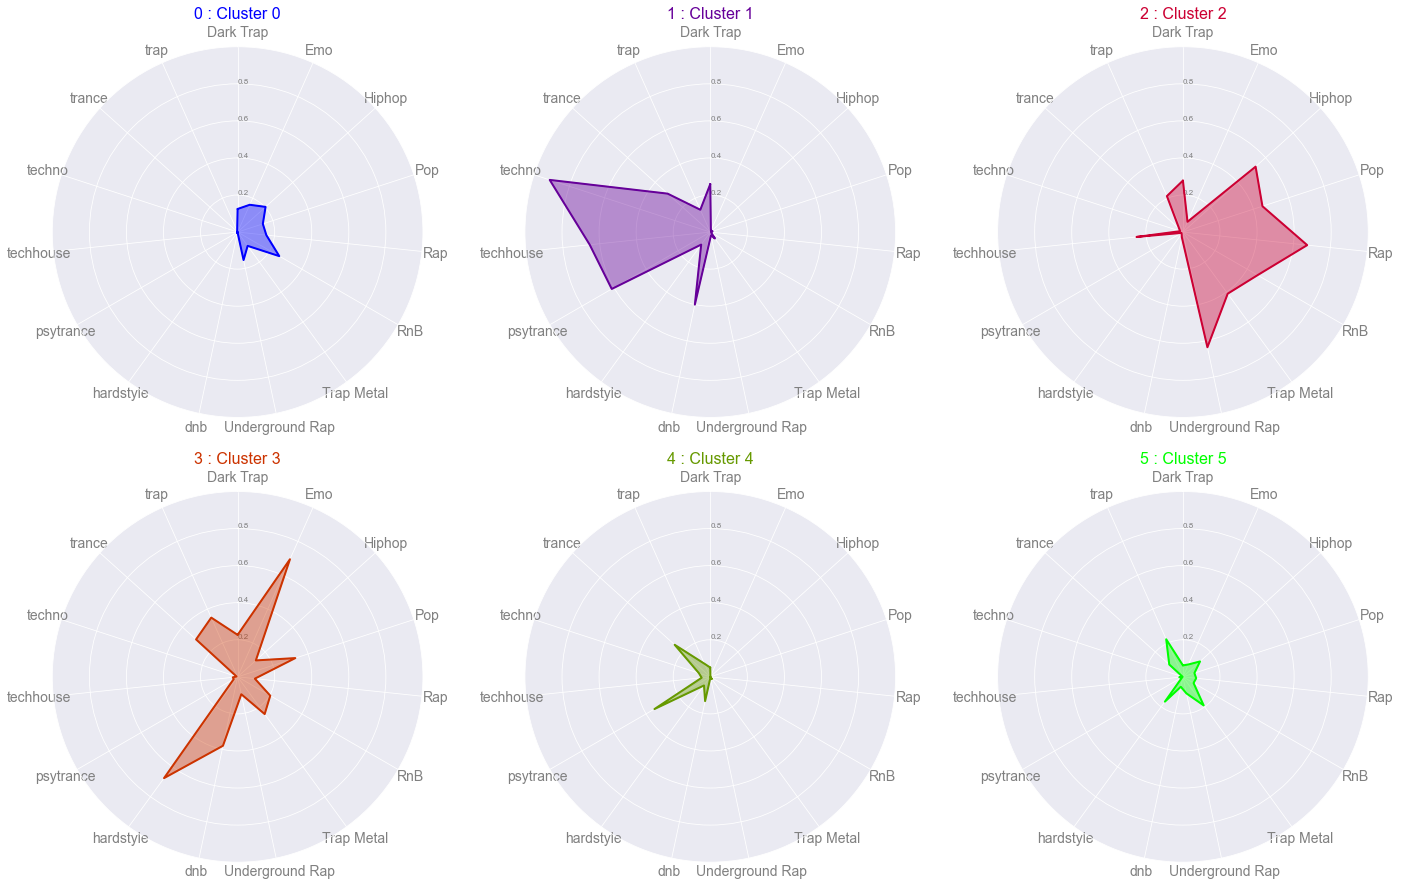

In [36]:
plt.figure(figsize=(24,15))

# Create a color palette:
my_palette = plt.cm.get_cmap("brg", len(genres_clusters_radar_df.index))

# Create cluster name
title_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3',
              'Cluster 4', 'Cluster 5']

# Loop to plot
for row in range(0, len(genres_clusters_radar_df.index)):
    make_radar(row=row, title=str(genres_clusters_radar_df['cluster'][row]) + ' : ' + title_list[row],
               color=my_palette(row), dframe=genres_clusters_radar_df, num_clusters=len(genres_clusters_radar_df.index))
save_plot("radar_genres_spotify")

In [37]:
pca = PCA(n_components=3, random_state=42)
songs_pca = pca.fit_transform(spotify_scaled)
pca.explained_variance_ratio_.sum()

0.7714273508051838

In [38]:
df_pca = pd.DataFrame(songs_pca, columns=['C1', 'C2', 'C3'])
df_pca['cluster'] = model.labels_
df_pca.head()

,C1,C2,C3,cluster
0,-0.319154,-0.214602,-0.152648,2
1,-0.296384,-0.242592,0.108597,0
2,-0.305017,0.114468,-0.115221,2
3,-0.278433,0.121276,0.121478,3
4,-0.327683,-0.171591,-0.045317,2


In [39]:
sampled_clusters_pca = pd.DataFrame()

# Обрезаем все кластеры до равного значения экземляров (равняемся по минимальному)
for c in df_pca.cluster.unique():
    df_cluster_sampled_pca = df_pca[df_pca.cluster == c].sample(n=int(minor_cluster), random_state=42)
    sampled_clusters_pca = pd.concat([sampled_clusters_pca,df_cluster_sampled_pca], axis=0)
sampled_clusters_pca.cluster.value_counts()

0    3224
1    3224
2    3224
3    3224
4    3224
5    3224
Name: cluster, dtype: int64

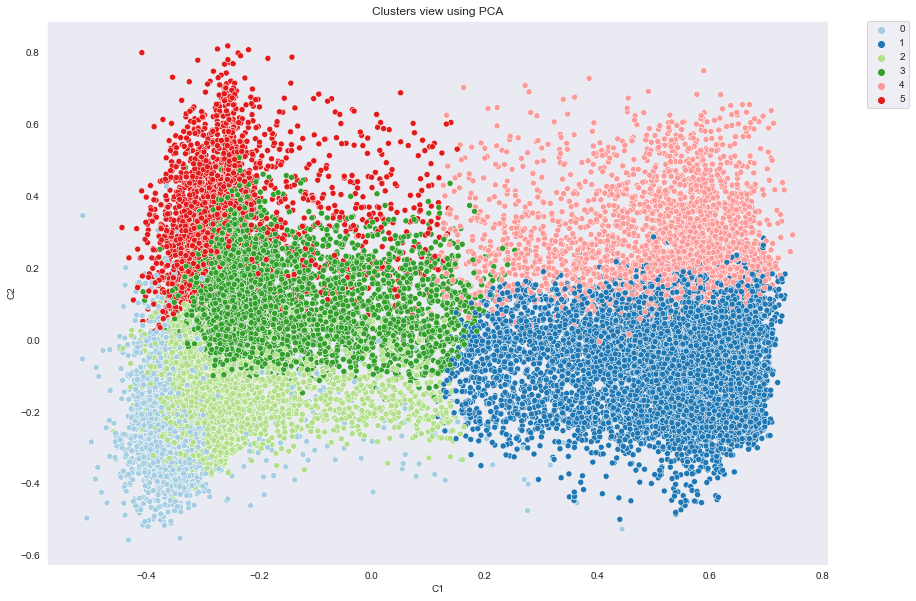

In [40]:
fig, ax = plt.subplots(figsize=(14,10))

sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_pca , legend="full", palette='Paired', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using PCA')
plt.grid(alpha=0.8)
save_plot("pca_cluster2d_base")
plt.show()

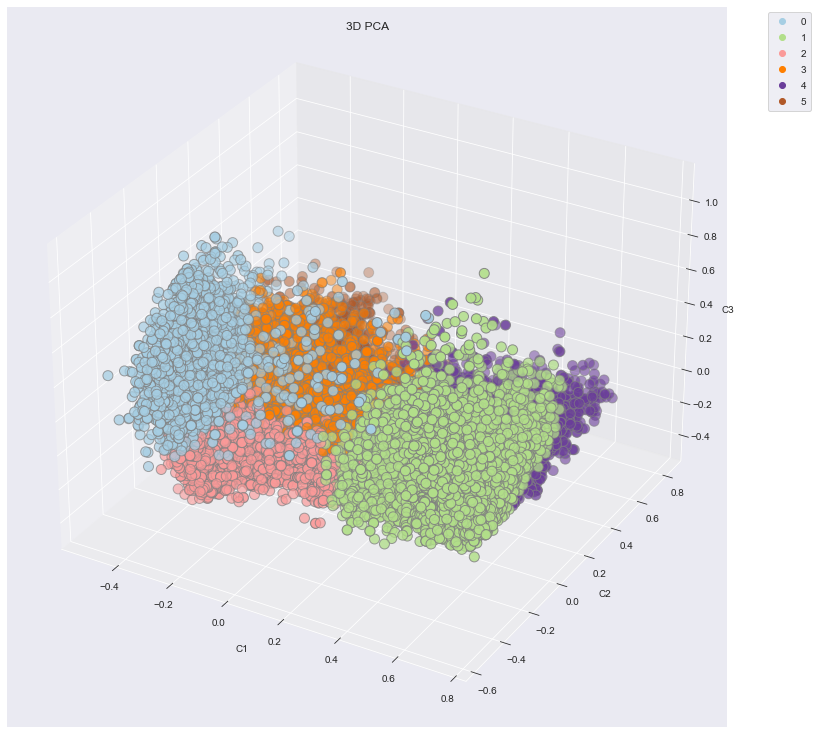

In [41]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('3D PCA')
ax = Axes3D(fig)

sc = ax.scatter(df_pca['C1'], df_pca['C2'], df_pca['C3'],
           c=df_pca['cluster'], cmap='Paired', s=100, edgecolors="gray")

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
save_plot("pca_cluster3d_base")
plt.show()

In [94]:
tsne = TSNE(n_components=3, perplexity=50, random_state=42)
songs_tsne = tsne.fit_transform(spotify_scaled)

In [95]:
df_tsne = pd.DataFrame(songs_tsne, columns=['C1', 'C2', "C3"])
df_tsne['cluster'] = model.labels_
df_tsne.head()

,C1,C2,C3,cluster
0,1.837189,8.373034,4.930707,3
1,3.390948,-1.109116,20.109535,0
2,-7.586645,10.623158,11.300189,2
3,-15.230140,2.284771,12.722315,2
4,11.729497,9.843310,10.931758,4


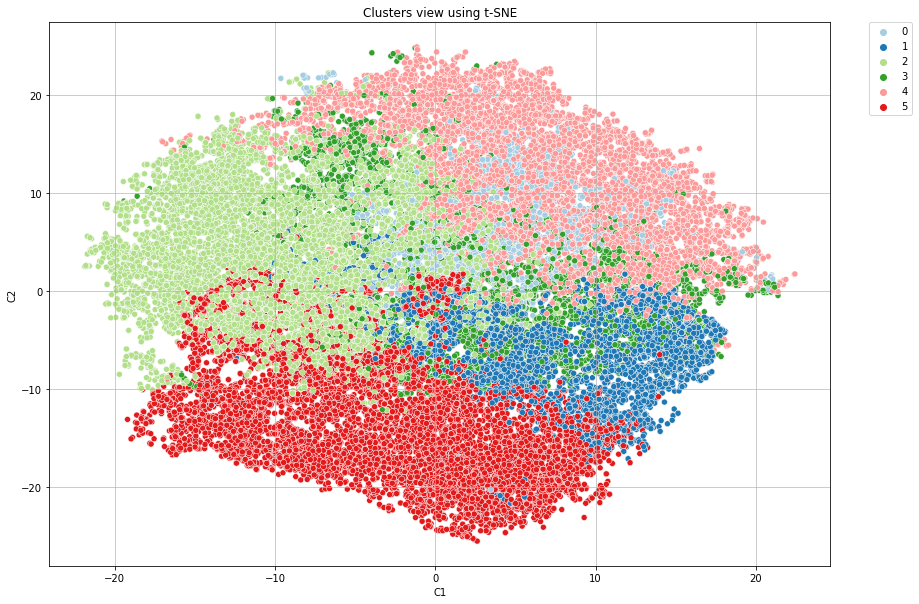

In [99]:
fig, ax = plt.subplots(figsize=(14,10))

sns.scatterplot(x='C1', y='C2', hue='cluster', data=df_tsne , legend="full", palette='Paired', ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Clusters view using t-SNE')
plt.grid(alpha=0.8)
save_plot("tsne_cluster2d_base")
plt.show()

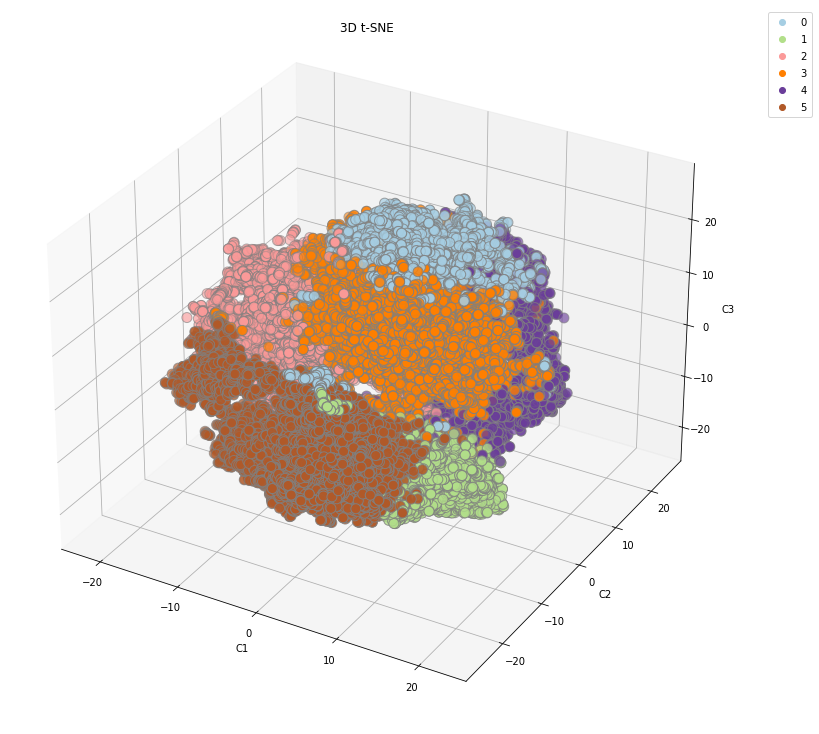

In [97]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('3D t-SNE')
ax = Axes3D(fig)

sc = ax.scatter(df_tsne['C1'], df_tsne['C2'], df_tsne['C3'],
           c=df_tsne['cluster'], cmap='Paired', s=100, edgecolors="gray")

ax.set_xlabel('C1')
ax.set_ylabel('C2')
ax.set_zlabel('C3')
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)
save_plot("tsne_3d_base")
plt.show()

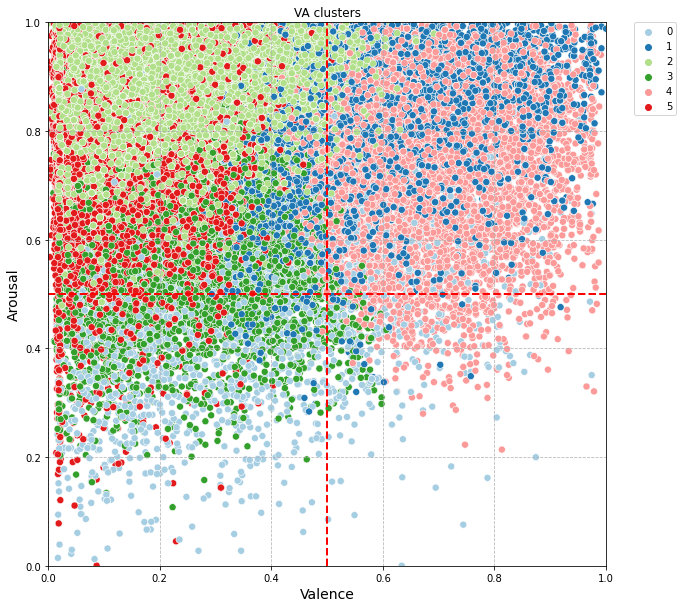

In [117]:
fig, ax = plt.subplots(figsize=(10,10))

sns.scatterplot(x='valence_scaled', y='energy_scaled', hue='cluster', data=spotify_scaled_df[:], legend="full", palette='Paired', ax=ax, s=50)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('VA clusters')
xmin, xmax = plt.xlim(0, 1.0)
ymin, ymax = plt.ylim(0, 1.0)
plt.vlines(0.5, ymin, ymax, linestyle='dashed', colors=["red"], lw=2)
plt.hlines(0.5, xmin, xmax, linestyle='dashed', colors=["red"], lw=2)
plt.grid(alpha=0.9, linestyle='--')
plt.xlabel('Valence', size=14)
plt.ylabel('Arousal', size=14)

save_plot("va_clusters_base")
plt.show()

In [112]:
spotify_scaled_df[spotify_scaled_df["cluster"] == 10]

,acousticness_scaled,danceability_scaled,energy_scaled,instrumentalness_scaled,liveness_scaled,valence_scaled,tempo_scaled,speechiness_scaled,loudness_scaled,cluster
